# Test Train Split and Cross Validation

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.shape

(506, 13)

In [5]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
X.dropna(axis=1, how='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
X.shape

(506, 13)

In [9]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
print(boston.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Train your model on the the **training** data
- Score and plot your predictions for the **test** data (i.e., a scatter plot of actual y values versus predicted y values)
- How well did your model do?

In [11]:
x = X[['CRIM', 'RM', 'LSTAT']]
y = pd.DataFrame(boston.target)

In [12]:
print(x.head())

      CRIM     RM  LSTAT
0  0.00632  6.575   4.98
1  0.02731  6.421   9.14
2  0.02729  7.185   4.03
3  0.03237  6.998   2.94
4  0.06905  7.147   5.33


In [13]:
print(y.head())

      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5) # performing a 50/50 split on x & y
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(253, 3) (253, 3) (253, 1) (253, 1)


In [15]:
lr = LinearRegression() # fit a linear regression on teh training sets.
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train)) # scoring the training sets to the linear regression model

0.6675856092


In [16]:
print(lr.score(x_test, y_test)) # scoring a linear regression on the test set.
# training set has a slightly higher R2

0.621885227849


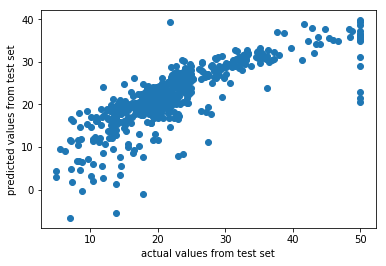

In [17]:
plt.scatter(y, lr.predict(x))
plt.xlabel('actual values from test set')
plt.ylabel('predicted values from test set')
plt.show()
# the R2 from the training set is slightly higher than the test set data

### 3. Try ratios of 70/30 and 90/10 for the training set to test set

- Score and plot your test set (i.e., a scatter plot of actual y values versus predicted y values)
- How does the score change across both of them?

In [18]:
X = x.copy()
Y = y.copy()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(151, 3) (355, 3) (151, 1) (355, 1)


In [20]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print('Model score with training data: ', LR.score(X_train, Y_train))
print('Model score with test data: ', LR.score(X_test, Y_test))

Model score with training data:  0.643344898054
Model score with test data:  0.608094877396


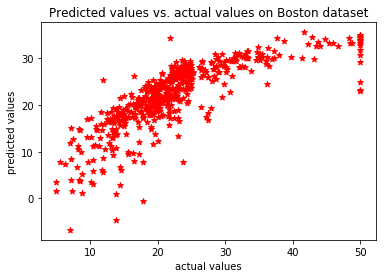

In [22]:
plt.scatter(y, LR.predict(x), marker='*', c='red')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted values vs. actual values on Boston dataset')
plt.show()

In [23]:
xn = X.copy()
yn = Y.copy()

xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.90)
lreg= LinearRegression()

lreg.fit(xn_train, yn_train)
lreg.score(xn_train, yn_train)

0.57253097329319202

In [24]:
lreg.score(xn_test, yn_test)

0.61149319035433747

In [25]:
print(xn_train.shape, yn_train.shape, xn_test.shape, yn_test.shape)

(50, 3) (50, 1) (456, 3) (456, 1)


In [26]:
print('Model score with training data: ', lreg.score(xn_train, yn_train))
print('Model score with test data: ', lreg.score(xn_test, yn_test))

Model score with training data:  0.572530973293
Model score with test data:  0.611493190354


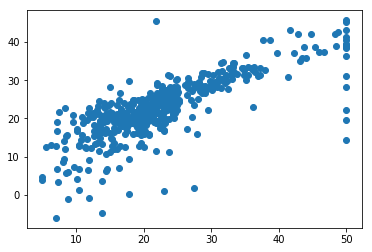

In [27]:
plt.scatter(yn, lreg.predict(xn))

### 4. Try K-Folds cross-validation with _k_ between 5-10 for your regression. 

You can use either `cross_val_score` / `cross_val_predict` or the `KFolds` iterator

- What set of variables are optimal? 
- How do your scores change?  
- How does the variance of the scores change?
- Try different folds to get a sense of how this impacts your score.

# Using cross val score/predict 

Cross validated scores are  [ 0.6521175   0.69284764  0.41805354  0.17536791 -0.28312566]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


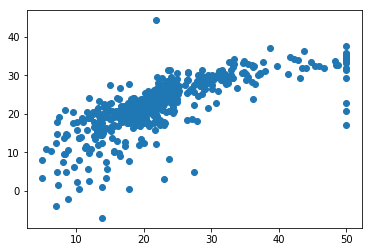

In [28]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lreg, xn, yn, cv=5)
print('Cross validated scores are ', scores)
predictions = cross_val_predict(lreg, xn, yn, cv=5)
plt.scatter(yn, predictions)

In [29]:
print('Average R2 score is ', scores.mean(), 'standard deviation is ', scores.std())

Average R2 score is  0.331052184933 standard deviation is  0.358608462859


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yn, predictions)
print('the mean squared error is',mse)

the mean squared error is 38.5532409245


## KFold method

In [31]:
from sklearn.model_selection import KFold, StratifiedKFold

xc = x.copy()
yc = y.copy()

print(xc.shape, yc.shape)

(506, 3) (506, 1)


In [32]:
kfolds = KFold(5)

In [35]:
xc_array = np.array(xc)
yc_array = np.array(yc)

print(xc_array.shape)
print(yc_array.shape)

(506, 3)
(506, 1)


In [36]:
counter = 0
for training_index, test_index in kfolds.split(xc_array, yc_array):
    x_train_new = xc_array[training_index]
    x_test_new = xc_array[test_index]
    y_train_new = yc_array[training_index]
    y_test_new = yc_array[test_index]
    print('fold', counter, '-', x_train_new.shape, x_test_new.shape, y_train_new.shape, y_test_new.shape)
    counter += 1 

fold 0 - (404, 3) (102, 3) (404, 1) (102, 1)
fold 1 - (405, 3) (101, 3) (405, 1) (101, 1)
fold 2 - (405, 3) (101, 3) (405, 1) (101, 1)
fold 3 - (405, 3) (101, 3) (405, 1) (101, 1)
fold 4 - (405, 3) (101, 3) (405, 1) (101, 1)


Fold 0 - r^2 score: 0.652117499747 mse: 12.0141900241


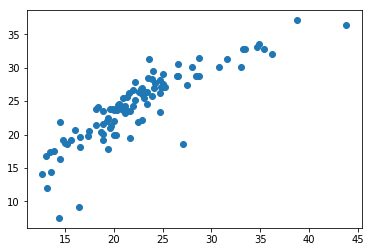

Fold 1 - r^2 score: 0.692847640786 mse: 27.9621535388


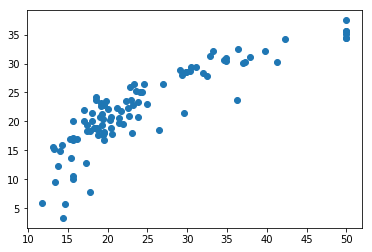

Fold 2 - r^2 score: 0.418053540799 mse: 46.6064643385


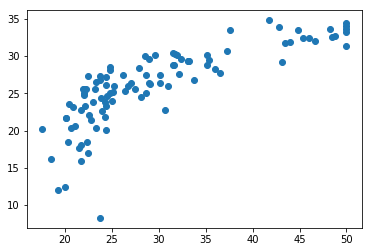

Fold 3 - r^2 score: 0.175367906882 mse: 72.330007924


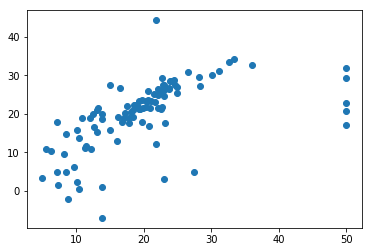

Fold 4 - r^2 score: -0.283125663547 mse: 34.1161516773


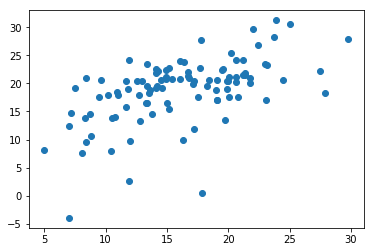

In [39]:
from sklearn.metrics import mean_squared_error

counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(xc_array, yc_array):
    x_train_new = xc_array[training_index]
    x_test_new = xc_array[test_index]
    y_train_new = yc_array[training_index]
    y_test_new = yc_array[test_index]
    lr.fit(x_train_new, y_train_new)
    r2_score = lr.score(x_test_new, y_test_new)
    fold_predictions = lr.predict(x_test_new)
    mse_score = mean_squared_error(y_test_new, fold_predictions)
    plt.scatter(y_test_new, fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    plt.show()
    counter += 1

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using train/test split and K-Folds? Set up a scheme to do the following:

1. Create a holdout test set using `train_test_split()`. 
  - We will use the training set in our cross-validation part below to find the right set of columns.
  - We will check the best set of columns that we have found against the holdout test as a final check on our work
2. Iterate through every pair of columns (use a for loop!) in the training set you created in step 1 and look at the average $R^2$ score found by `cross_val_score()`
3. Pick the pair of columns that has the highest cross-validated $R^2$ code and fit a Linear Regression using those columns as the predictors in the full training set you created in step 1.
4. Test this "final" model against the holdout test set you created in step 1. How well does it perform?

### 5.1 Can you explain what could be wrong with this approach?

### 6. [Bonus] Explore another target variable 

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

> *Tip: Check out pairplots, coefficients, and pearson scores.*